#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [3]:
print(f'the dataset currently has {df.shape[0]} rows and {df.shape[1]} columns')

the dataset currently has 148654 rows and 13 columns


In [4]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [5]:
df.isna().any()

Id                  False
EmployeeName        False
JobTitle            False
BasePay              True
OvertimePay          True
OtherPay             True
Benefits             True
TotalPay            False
TotalPayBenefits    False
Year                False
Notes                True
Agency              False
Status               True
dtype: bool

In [6]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [7]:
#looks like there are 2 empty columns let's check that case:
display(df['Notes'].unique())
df['Status'].unique()

array([nan])

array([nan])

In [8]:
#good bye full empty columns
df.drop(['Status', 'Notes'], axis = 1, inplace= True)

In [9]:
# looks like the column should be numeric
df['Benefits'] = df['Benefits'].astype('float64')

In [10]:
# Now for the descriptive statistics
print(f"Mean salary: ${df['TotalPay'].mean():.2f}")
print(f"Median salary: ${df['TotalPay'].median():.2f}")
print(f"Mode salary: ${df['TotalPay'].mode()[0]:.2f}")
print(f"Minimum salary: ${df['TotalPay'].min():.2f}")
print(f"Maximum salary: ${df['TotalPay'].max():.2f}")
print(f"Standard deviation: ${df['TotalPay'].std():.2f}")


Mean salary: $74768.32
Median salary: $71426.61
Mode salary: $0.00
Minimum salary: $-618.13
Maximum salary: $567595.43
Standard deviation: $50517.01


In [11]:
df['TotalPayBenefits'].min()

-618.13

In [12]:
df[df['TotalPayBenefits'] <= 0]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
36156,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.00,NaN,0.00,0.00,2011,San Francisco
36157,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.00,NaN,0.00,0.00,2011,San Francisco
36158,36159,JOSEPHINE MCCREARY,MANAGER IV,0.0,0.0,0.00,NaN,0.00,0.00,2011,San Francisco
110528,110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.00,-2.73,0.00,-2.73,2013,San Francisco
110529,110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.00,-8.20,0.00,-8.20,2013,San Francisco
110530,110531,David P Kucia,Police Officer 3,NaN,0.0,0.00,-33.89,0.00,-33.89,2013,San Francisco
148626,148627,Paulet Gaines,Account Clerk,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148627,148628,Brett A Lundberg,General Laborer,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148628,148629,Mark W Mcclure,General Laborer,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148629,148630,Elizabeth Iniguez,Transcriber Typist,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco


In [13]:
#Looks like these values with zero or less salary are unresonable let's consider them Nan for now
df['TotalPay'] = df['TotalPay'].apply(lambda x: np.nan if x <= 0 else x)
display(df['TotalPay'].describe())
df['TotalPay'].std()

count    148285.000000
mean      74954.383468
std       50441.766219
min           0.300000
25%       36679.200000
50%       71553.000000
75%      105967.060000
max      567595.430000
Name: TotalPay, dtype: float64

50441.766218846395

In [14]:
# Now for the updated descriptive statistics
print(f"Mean salary: ${df['TotalPay'].mean():.2f}")
print(f"Median salary: ${df['TotalPay'].median():.2f}")
print(f"Mode salary: ${df['TotalPay'].mode()[0]:.2f}")
print(f"Minimum salary: ${df['TotalPay'].min():.2f}")
print(f"Maximum salary: ${df['TotalPay'].max():.2f}")
print(f"Standard deviation: ${df['TotalPay'].std():.2f}")

Mean salary: $74954.38
Median salary: $71553.00
Mode salary: $18594.00
Minimum salary: $0.30
Maximum salary: $567595.43
Standard deviation: $50441.77


In [15]:
#attempting to removing observation if they amount to five percent or less of all values
threshold = len(df) * 0.05
cols_to_drop = df.columns[(df.isna().sum() <= threshold) & (df.isna().sum() > 0)]
df.dropna(subset= cols_to_drop, inplace= True)

In [16]:
df.isna().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay                 0
OvertimePay             0
OtherPay                0
Benefits            36156
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

<Axes: >

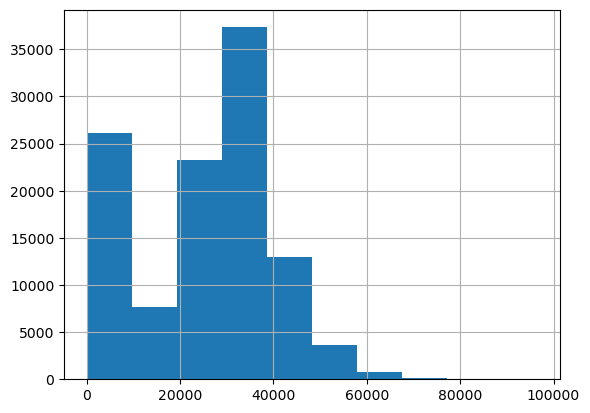

In [17]:
df['Benefits'].hist()

In [18]:
#looks like the column is positively skewed so we replace null values with the median
df['Benefits'].fillna(df['Benefits'].median(), inplace=True)

In [19]:
df['JobTitle'].head()

0    GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1                   CAPTAIN III (POLICE DEPARTMENT)
2                   CAPTAIN III (POLICE DEPARTMENT)
3              WIRE ROPE CABLE MAINTENANCE MECHANIC
4      DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
Name: JobTitle, dtype: object

In [20]:
# Define department mappings with lowercase keywords
department_keywords = {
    'PUBLIC_SAFETY': ['POLICE', 'OFFICER', 'DETECTIVE', 'PATROL', 'SERGEANT', 'CAPTAIN', 'CHIEF',
                      'FIRE', 'FIREFIGHTER', 'RESCUE', 'PARAMEDIC', 'EMS', 'EMERGENCY', 'COMMUNICATIONS', 'DISPATCHER'],
    'TRANSPORTATION': ['TRANSIT', 'AUTHORITY', 'TRANSPORTATION', 'BUS', 'TRAIN', 'SUBWAY', 'RAIL', 'TRUCK', 'DRIVER'],
    'FACILITY_MAINTENANCE': ['MECHANIC', 'TECHNICIAN', 'REPAIR', 'ELECTRICIAN', 'PLUMBER', 'MASON',
                             'CUSTODIAN', 'PORTER', 'MAINTENANCE', 'CLEANER', 'GARDENER', 'HORTICULTURE',
                             'LANDSCAPE', 'STATIONARY ENGINEER', 'MUSEUM', 'GUARD', 'PAINTER', 'GLAZIER'],
    'ADMINISTRATION': ['ADMINISTRATIVE', 'CLERICAL', 'SECRETARY', 'ASSISTANT', 'DATA ENTRY', 'CLERK',
                        'OFFICE', 'LIBRARY', 'LIBRARIAN', 'PAGE', 'AIDE', 'PROFESSOR', 'PUBLIC SERVICE', 'MAYOR'],
    'ENGINEERING': ['ENGINEER', 'ASSOC ENGINEER', 'ASST ENGR', 'DRAFTING'],
    'LEGAL': ['COUNSELOR', 'ATTORNEY', 'LAWYER', 'PROSECUTOR', 'ADVOCATE', 'PARALEGAL'],
    'PUBLIC_SERVICES': ['PUBLIC WORKS', 'PARK', 'RECREATION', 'RANGER', 'GROUNDSKEEPER'],
    'SOCIAL_SERVICES': ['SOCIAL', 'ELIGIBILITY', 'WORKER', 'CASEWORKER', 'COUNSELOR', 'JUVENILE HALL'],
    'TRADES': ['METAL', 'SMITH', 'ELECTRICIAN', 'PLUMBER', 'MASON', 'CARPENTER', 'WELDER', 'TRAFFIC SIGNAL OPERATOR'],
    'HEALTHCARE': ['MEDICAL', 'HOSPITAL', 'CLINIC', 'DOCTOR', 'NURSE', 'THERAPIST', 'PSYCHIATRIC',
                   'ACUPUNCTURIST', 'PHARMACY', 'FORENSIC', 'TOXICOLOGIST'],
    'LAW_ENFORCEMENT': ['SHERIFF', 'DEPUTY', 'PATROL', 'INVESTIGATOR', 'CORRECTIONS'],
    'GENERAL_LABOR': ['LABORER', 'MAINTENANCE', 'CUSTODIAN', 'GROUNDSKEEPER'],
    'SUPERVISORY': ['SUPERVISOR', 'FOREMAN', 'MANAGER', 'LEAD'],
    'GOVERNMENT': ['MAYORAL', 'STAFF', 'LEGISLATIVE', 'POLITICAL'],
    'OTHER': ['CASHIER', 'BAKER', 'WHARFINGER', 'ATTENDANT', 'MISCELLANEOUS', 'CONVERSION']
}
# Assign departments based on lowercase keyword matches
for index, row in df.iterrows():
    job_title = row['JobTitle'].lower()  # Apply lower() to job title
    assigned_department = None
    for department, keywords in department_keywords.items():
        if any(keyword.lower() in job_title for keyword in keywords):  # Check for lowercase keywords
            assigned_department = department
            break
    if assigned_department:
        df.loc[index, 'Department'] = assigned_department
    else:
        df.loc[index, 'Department'] = 'OTHER'


<Axes: >

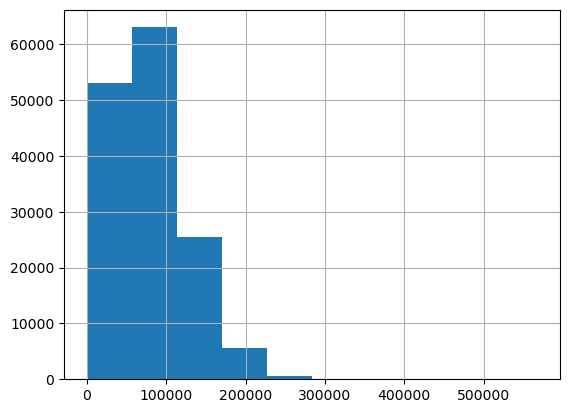

In [21]:
df['TotalPay'].hist()

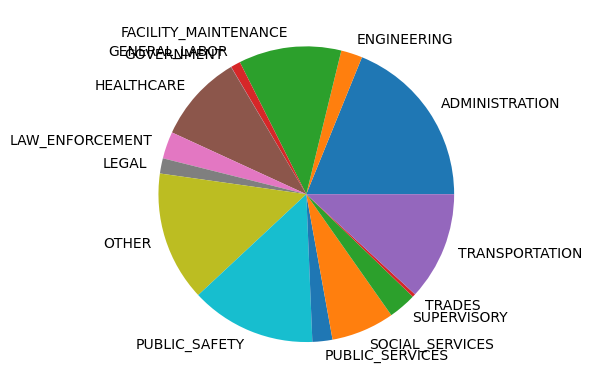

In [22]:
import matplotlib.pyplot as plt
department_counts = df.groupby('Department')['JobTitle'].count()
plt.pie(department_counts, labels=department_counts.index) 
plt.show()

In [23]:
df.groupby(['Year', 'Department']).agg({
    'TotalPay': ['mean', 'std', 'min', 'max']
})

TotalPay                                   
                                    mean           std       min        max
Year Department                                                            
2011 ADMINISTRATION         44909.990218  30267.122678     17.78  274550.25
     ENGINEERING           102753.534738  37916.977741    340.30  179123.44
     FACILITY_MAINTENANCE   58667.076067  36181.232629      4.17  332343.61
     GENERAL_LABOR          50682.055745  20213.712104     93.80  106010.02
     HEALTHCARE             71178.019378  51245.814586     39.32  257124.44
     LAW_ENFORCEMENT        94055.513160  37424.430933     98.10  307899.46
     LEGAL                  99147.844521  55093.138358    117.12  234848.11
     OTHER                  71224.764413  42690.460970     46.00  294580.02
     PUBLIC_SAFETY         118798.630137  46835.873830      5.80  538909.28
     PUBLIC_SERVICES        13969.154172  20267.472269     27.63  111108.73
     SOCIAL_SERVICES        56420.485415  24563.745593     55.39  140455.72
     SUPERVISORY           107459.943355  43458.061925    772.68  230377.83
     TRADES                 80426.766794  22912.009750   1836.53  127556.81
     TRANSPORTATION         65547.826830  42036.194435      0.30  567595.43
2012 ADMINISTRATION         45296.508550  30332.601218      4.75  260574.05
     ENGINEERING           101215.376070  31961.694469    602.17  183359.87
     FACILITY_MAINTENANCE   59619.593327  37819.397379     17.95  336393.73
     GENERAL_LABOR          54558.293571  18378.139201     84.40  107008.31
     GOVERNMENT             46182.538000  31521.518294   1445.50   80782.01
     HEALTHCARE             73673.871684  53768.010048      3.28  264364.82
     LAW_ENFORCEMENT        95355.963170  35001.929721     24.76  228212.96
     LEGAL                 105037.046998  57403.721655    411.60  227238.02
     OTHER                  82922.968267  47514.244860     21.04  294000.17
     PUBLIC_SAFETY         121466.469310  55167.786265     21.98  362844.66
     PUBLIC_SERVICES        15189.994365  21757.913464     27.89  111108.17
     SOCIAL_SERVICES        60307.732296  24655.418209     84.78  178481.85
     SUPERVISORY           113098.906778  44015.907375    225.71  255621.32
     TRADES                 80796.886142  23317.605130    100.00  132307.93
     TRANSPORTATION         64444.537481  38262.243688      1.77  299162.31
2013 ADMINISTRATION         47851.658496  32708.869396     26.34  285446.37
     ENGINEERING           110651.521383  31498.750918   2826.04  201803.00
     FACILITY_MAINTENANCE   63985.289507  39715.511466     38.50  195294.10
     GENERAL_LABOR          59131.988850  19643.000695   1291.70  109422.68
     GOVERNMENT             50587.216923  27293.416375   7310.90   86424.04
     HEALTHCARE             79064.725947  57479.230320     22.57  276831.50
     LAW_ENFORCEMENT       103515.214231  41487.037573    456.60  308434.84
     LEGAL                 114814.375483  61107.167314     90.04  252221.06
     OTHER                  88083.007813  50299.618379     25.00  335537.96
     PUBLIC_SAFETY         130664.179487  55616.346706    200.20  347102.32
     PUBLIC_SERVICES        15259.300387  22162.680544     32.17  115431.36
     SOCIAL_SERVICES        62762.581023  26902.939718    583.53  163329.51
     SUPERVISORY           121119.417421  44304.216239    113.61  257250.80
     TRADES                 86822.254797  26706.666047    157.75  161291.81
     TRANSPORTATION         66333.551151  39088.492929     15.83  229785.10
2014 ADMINISTRATION         45668.041607  31780.363304     12.89  281537.17
     ENGINEERING           106002.165831  35807.792030    219.12  201181.01
     FACILITY_MAINTENANCE   62715.281907  39598.070329     17.26  190189.04
     GENERAL_LABOR          58654.420857  20064.566991     41.37  128032.17
     GOVERNMENT             69704.906667   7719.180348  63191.38   86167.03
     HEALTHCARE             77032.684779  57442.433694      6.00  268946.02
    

In [24]:
df.groupby('Year').agg({
    'TotalPay': ['mean', 'std', 'min', 'max', 'median']
})

TotalPay                                           
              mean           std    min        max     median
Year                                                         
2011  71750.056751  47496.180914   0.30  567595.43  68217.525
2012  74163.691800  49502.988373   1.77  362844.66  70753.440
2013  78808.285041  52410.194304  15.83  347102.32  75252.710
2014  75568.993154  51656.873381   1.83  471952.64  72413.840

In [25]:
df.groupby('Department').agg({
    'TotalPay': ['mean', 'std', 'min', 'max', 'median']
})

TotalPay                                    \
                               mean           std      min        max   
Department                                                              
ADMINISTRATION         45961.915695  31340.874367     4.75  285446.37   
ENGINEERING           105236.147902  34524.037581   219.12  201803.00   
FACILITY_MAINTENANCE   61180.034181  38361.704790     4.17  336393.73   
GENERAL_LABOR          55605.258272  19883.918681    41.37  128032.17   
GOVERNMENT             55883.373714  25515.384735  1445.50   86424.04   
HEALTHCARE             75269.598626  55156.070430     3.28  276831.50   
LAW_ENFORCEMENT        99075.517756  39156.700407    24.76  308434.84   
LEGAL                 107346.709976  58809.579463    13.35  252221.06   
OTHER                  82809.782272  48463.527833    12.78  390111.98   
PUBLIC_SAFETY         123176.604115  53417.501831     1.83  538909.28   
PUBLIC_SERVICES        15026.452986  21631.328804    15.36  119760.91   
SOCIAL_SERVICES        60020.723824  26346.489887    43.50  179568.68   
SUPERVISORY           115218.414768  44838.210380   113.61  258676.54   
TRADES                 81792.015678  27424.602802   100.00  190014.48   
TRANSPORTATION         64335.236527  40035.472796     0.30  567595.43   

                                  
                          median  
Department                        
ADMINISTRATION         51490.585  
ENGINEERING           109063.070  
FACILITY_MAINTENANCE   58963.250  
GENERAL_LABOR          60764.905  
GOVERNMENT             64935.920  
HEALTHCARE             74604.710  
LAW_ENFORCEMENT       102751.030  
LEGAL                 111688.400  
OTHER                  83896.990  
PUBLIC_SAFETY         130094.180  
PUBLIC_SERVICES         6868.890  
SOCIAL_SERVICES        64211.870  
SUPERVISORY           119925.870  
TRADES                 85310.360  
TRANSPORTATION         71982.875

<Axes: >

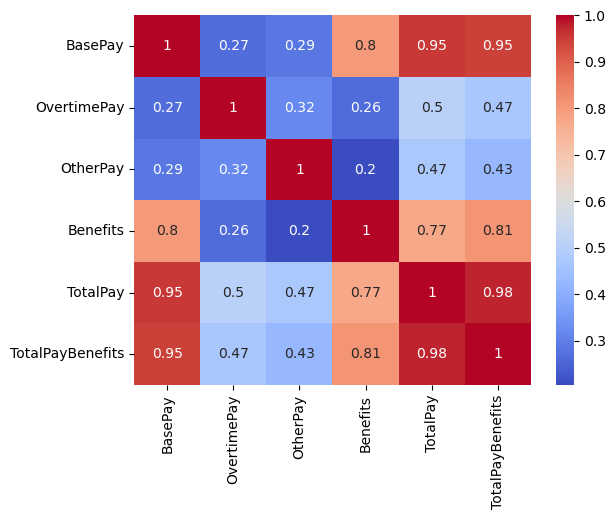

In [26]:
import seaborn as sns
sns.heatmap(df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].corr(), 
            annot = True, cmap='coolwarm')

<Axes: xlabel='TotalPay', ylabel='Benefits'>

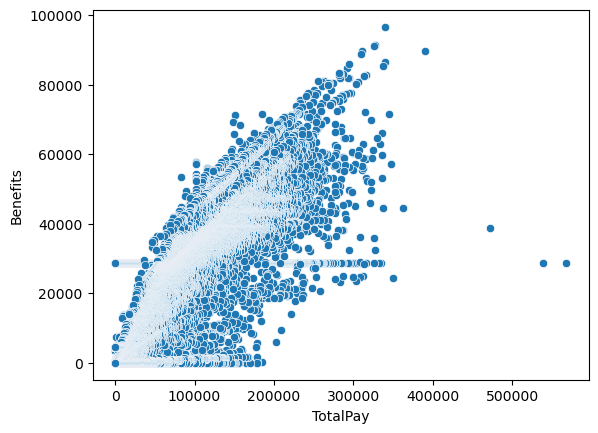

In [27]:
sns.scatterplot(df, x = 'TotalPay', y = 'Benefits')

In [28]:
print('''Summary of Findings and Insights

- The analysis of the 'TotalPay' across different departments revealed significant variations in mean TotalPay.
The 'PUBLIC_SAFETY' department stood out with the highest mean TotalPay, while 'PUBLIC_SERVICES' had the lowest mean TotalPay. 
The standard deviation also varied widely across departments, indicating differences in the dispersion of TotalPay values.

- The yearly analysis of 'TotalPay' demonstrated an increasing trend in mean TotalPay from 2011 to 2013, followed by
a slight decrease in 2014. The standard deviation also showed an increasing pattern, 
suggesting greater variability in TotalPay over the years.

- The correlation coefficient between TotalPay and Benefits was calculated to be 0.77, 
indicating a strong positive correlation. This suggests that as TotalPay increases, 
the value of Benefits also tends to increase, 
highlighting the significant association between the two variables.

- The findings suggest that there are substantial differences in TotalPay across departments, 
with 'PUBLIC_SAFETY' and 'PUBLIC_SERVICES' displaying notable disparities. 
Additionally, the analysis of TotalPay over the years indicates fluctuations in mean TotalPay and increased variability. 
The strong correlation between TotalPay and Benefits underscores the importance of 
considering both factors when evaluating compensation packages.
''')

Summary of Findings and Insights

- The analysis of the 'TotalPay' across different departments revealed significant variations in mean TotalPay.
The 'PUBLIC_SAFETY' department stood out with the highest mean TotalPay, while 'PUBLIC_SERVICES' had the lowest mean TotalPay. 
The standard deviation also varied widely across departments, indicating differences in the dispersion of TotalPay values.

- The yearly analysis of 'TotalPay' demonstrated an increasing trend in mean TotalPay from 2011 to 2013, followed by
a slight decrease in 2014. The standard deviation also showed an increasing pattern, 
suggesting greater variability in TotalPay over the years.

- The correlation coefficient between TotalPay and Benefits was calculated to be 0.77, 
indicating a strong positive correlation. This suggests that as TotalPay increases, 
the value of Benefits also tends to increase, 
highlighting the significant association between the two variables.

- The findings suggest that there are substantial 

# Good Luck!